In [1]:
frame_num = 40

In [2]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path

%matplotlib inline

In [3]:
pix2pixhd_dir = Path('../src/pix2pixHD/')

import sys
sys.path.append(str(pix2pixhd_dir))

%load_ext autoreload
%autoreload 2

In [4]:
from options.train_options import TrainOptions
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer

In [5]:
with open('../data/train_opt.pkl', mode='rb') as f:
    opt = pickle.load(f)
    
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [6]:
print(opt)

Namespace(batchSize=1, beta1=0.5, checkpoints_dir='../checkpoints/', continue_train=False, data_type=32, dataroot='../data/target/train', debug=False, display_freq=640, display_winsize=512, feat_num=3, fineSize=512, fine_size=480, gpu_ids=[0], input_nc=3, instance_feat=False, isTrain=True, label_feat=False, label_nc=18, lambda_feat=10.0, loadSize=512, load_features=False, load_pretrain='', lr=0.0002, max_dataset_size=inf, model='pix2pixHD', nThreads=2, n_blocks_global=9, n_blocks_local=3, n_clusters=10, n_downsample_E=4, n_downsample_global=4, n_layers_D=3, n_local_enhancers=1, name='target', ndf=64, nef=16, netG='global', ngf=64, niter=20, niter_decay=20, niter_fix_global=0, no_flip=False, no_ganFeat_loss=False, no_html=False, no_instance=True, no_lsgan=False, no_vgg_loss=False, norm='instance', num_D=2, output_nc=3, phase='train', pool_size=0, print_freq=640, resize_or_crop='scale_width', save_epoch_freq=10, save_latest_freq=640, serial_batches=False, tf_log=False, use_dropout=False,

In [7]:
# opt.setAttributeNS()
# opt['fp16'] = False
# print(opt)

In [9]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
#(data_loader)
dataset_size = len(data_loader)
print('#training images = %d' % dataset_size)
    
start_epoch, epoch_iter = 1, 0
total_steps = (start_epoch-1) * dataset_size + epoch_iter
display_delta = total_steps % opt.display_freq
print_delta = total_steps % opt.print_freq
save_delta = total_steps % opt.save_latest_freq

CustomDatasetDataLoader
dataset [AlignedDataset] was created
#training images = 40


In [10]:
model = create_model(opt)
visualizer = Visualizer(opt)

GlobalGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(18, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU(inplace)
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_run

create web directory ../checkpoints/target/web...


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Scalar Discriminator Loss 1, loss = 0.6282
Scalar Gan Loss 1, loss = 16.7798
End of epoch 1 / 40 	 Time Taken: 21 sec
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Scalar Discriminator Loss 2, loss = 0.4116
Scalar Gan Loss 2, loss = 12.5518
End of epoch 2 / 40 	 Time Taken: 17 sec
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Scalar Discriminator Loss 3, loss = 0.3401
Scalar Gan Loss 3, loss = 12.8017
End of epoch 3 / 40 	 Time Taken: 17 sec
True
True
True
True
True
True
True
True
True
T

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Scalar Discriminator Loss 26, loss = 0.4947
Scalar Gan Loss 26, loss = 5.6588
End of epoch 26 / 40 	 Time Taken: 17 sec
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Scalar Discriminator Loss 27, loss = 0.4060
Scalar Gan Loss 27, loss = 6.0830
End of epoch 27 / 40 	 Time Taken: 17 sec
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Scalar Discriminator Loss 28, loss = 0.4692
Scalar Gan Loss 28, loss = 5.3480
End of epoch 28 / 40 	 Time Taken: 17 sec
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


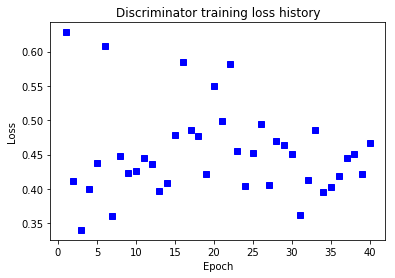

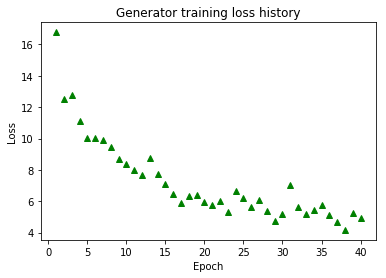

In [11]:
import cv2
loss_D = None
loss_G = None
loss_D_arr = []
loss_G_arr = []
epoch_arr = []
#visuals = OrderedDict()
# visuals['input_label'] = None
# visuals['synthesized_image'] = None
# visuals['real_image'] = None


# to save images and progress
#save_dir = Path('../results/test10/')
#save_dir.mkdir(exist_ok=True)

count = 0

for epoch in range(start_epoch, opt.niter + opt.niter_decay + 1): 
#for epoch in range(0, 10):
    epoch_start_time = time.time()
    if epoch != start_epoch:
        epoch_iter = epoch_iter % dataset_size
    for i, data in enumerate(dataset, start=epoch_iter):
        iter_start_time = time.time()
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize

        # whether to collect output images
        save_fake = total_steps % opt.display_freq == display_delta
        save_fake = True
        
        ############## Forward Pass ######################
        losses, generated = model(Variable(data['label']), Variable(data['inst']), 
            Variable(data['image']), Variable(data['feat']), infer=save_fake)
        
        # sum per device losses
        losses = [ torch.mean(x) if not isinstance(x, int) else x for x in losses ]
        loss_dict = dict(zip(model.module.loss_names, losses))

        # calculate final loss scalar
        loss_D = (loss_dict['D_fake'] + loss_dict['D_real']) * 0.5
        loss_G = loss_dict['G_GAN'] + loss_dict.get('G_GAN_Feat',0) + loss_dict.get('G_VGG',0)
        
        ############### Backward Pass ####################
        # update generator weights
        model.module.optimizer_G.zero_grad()
        loss_G.backward()
        model.module.optimizer_G.step()

        # update discriminator weights
        model.module.optimizer_D.zero_grad()
        loss_D.backward()
        model.module.optimizer_D.step()
        
        #call(["nvidia-smi", "--format=csv", "--query-gpu=memory.used,memory.free"]) 

        ############## Display results and errors ##########
        ### print out errors    

        # Commented out
        '''if total_steps % opt.print_freq == print_delta:
            print(loss_dict.items())
            print('Scalar Discriminator Loss %d, loss = %.4f' % (i, loss_D))
            print('Scalar Gan Loss %d, loss = %.4f' % (i, loss_G))     

            errors = {k: v.data[0] if not isinstance(v, int) else v for k, v in loss_dict.items()}
            t = (time.time() - iter_start_time) / opt.batchSize
            visualizer.print_current_errors(epoch, epoch_iter, errors, t)
            visualizer.plot_current_errors(errors, total_steps)'''

        ### display output images
        print(save_fake)
        if save_fake:
            visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                                   ('synthesized_image', util.tensor2im(generated.data[0])),
                                   ('real_image', util.tensor2im(data['image'][0]))])
#             cv2.imwrite(str(save_dir.joinpath('input_label_{:04d}.png'.format(epoch))), visuals['input_label'])    
#             cv2.imwrite(str(save_dir.joinpath('synth_image_{:04d}.png'.format(epoch))), visuals['synthesized_image'])    
#             cv2.imwrite(str(save_dir.joinpath('real_image_{:04d}.png'.format(epoch))), visuals['real_image'])   
            visualizer.display_current_results(visuals, epoch, total_steps)

#         visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
#                                    ('synthesized_image', util.tensor2im(generated.data[0])),
#                                    ('real_image', util.tensor2im(data['image'][0]))])
#         cv2.imwrite(str(save_dir.joinpath('input_label_{:04d}.png'.format(epoch))), visuals['input_label'])    
#         cv2.imwrite(str(save_dir.joinpath('synth_image_{:04d}.png'.format(epoch))), visuals['synthesized_image'])    
#         cv2.imwrite(str(save_dir.joinpath('real_image_{:04d}.png'.format(epoch))), visuals['real_image'])   
#         visualizer.display_current_results(visuals, epoch, total_steps)

        ### save latest model
        if total_steps % opt.save_latest_freq == save_delta:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.module.save('latest')            
            np.savetxt(iter_path, (epoch, epoch_iter), delimiter=',', fmt='%d')
        
        if epoch_iter >= dataset_size:
            break
    
    # Added for error analysis
    #print(loss_dict.items())
    count += 1   
    print('Scalar Discriminator Loss %d, loss = %.4f' % (epoch, loss_D))
    print('Scalar Gan Loss %d, loss = %.4f' % (epoch, loss_G)) 
    loss_D_arr.append(loss_D)
    loss_G_arr.append(loss_G)
    epoch_arr.append(epoch)

#     # display
#     plt.imshow(visuals['input_label'])
#     plt.show()
#     plt.imshow(visuals['synthesized_image'])
#     plt.show()
#     plt.imshow(visuals['real_image'])
#     plt.show()
#     # save
    # commented out
#     cv2.imwrite(str(save_dir.joinpath('input_label_{:04d}.png'.format(epoch))), visuals['input_label'])    
#     cv2.imwrite(str(save_dir.joinpath('synth_image_{:04d}.png'.format(epoch))), visuals['synthesized_image'])    
#     cv2.imwrite(str(save_dir.joinpath('real_image_{:04d}.png'.format(epoch))), visuals['real_image'])   

    
    # end of epoch 
    iter_end_time = time.time()
    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))

    ### save model for this epoch
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))        
        model.module.save('latest')
        model.module.save(epoch)
        np.savetxt(iter_path, (epoch+1, 0), delimiter=',', fmt='%d')

    ### instead of only training the local enhancer, train the entire network after certain iterations
    if (opt.niter_fix_global != 0) and (epoch == opt.niter_fix_global):
        model.module.update_fixed_params()

    ### linearly decay learning rate after certain iterations
    if epoch > opt.niter:
        model.module.update_learning_rate()

# Plot the losses
plt.plot(epoch_arr, loss_D_arr, 'bs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Discriminator training loss history')
plt.show()

plt.plot(epoch_arr, loss_G_arr, 'g^')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator training loss history')
plt.show()

torch.cuda.empty_cache()